![](files/images/EscUpmPolit_p.gif "UPM")

## Imports

In [1]:
import pandas as pd
import csv
import numpy as np
import pickle
from pandas.plotting import scatter_matrix
from scipy.stats import norm, skew
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Reading data

In [2]:
dtype_list=pickle.load(open('type/train.pkl','rb'))
df=pd.read_csv('dataset/train_data_balance_todos.csv',dtype=dtype_list)
df_original=df.copy()

In [3]:
pd.set_option('display.max_columns', None)
df

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1486116,1993,5405,7,207,17,5,12,13,37,4,21,5,-50,3,87,117,8,2,2,41,4,3,2,28,5,4,20,1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,12,17,7
1,1,1973268,1817,2242,3,210,70,4,17,88,40,4,25,5,-71,4,16,141,4,2,3,15,16,3,2,27,4,5,20,-1,-1,6,21^22^23,5,27,3
2,1,2045003,4400,2476,7,183,29,5,21,86,37,4,21,4,-97,3,46,141,9,2,2,42,4,3,2,14,10,3,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,12,17,1
3,0,1538596,3420,4680,8,142,36,5,12,80,41,4,26,7,-7,3,80,156,9,2,2,19,5,3,2,14,7,1,18,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,42,3
4,0,1879741,2229,5483,7,156,56,5,12,58,37,4,21,7,-75,5,80,156,4,2,2,28,14,3,2,14,7,1,18,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890971,0,1349053,1847,6428,6,178,17,5,18,70,39,4,17,5,-128,3,92,193,9,2,2,45,2,3,2,17,14,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,10,36,7
2890972,1,1610576,4186,4007,7,130,30,4,12,28,39,4,17,5,34,4,99,141,4,2,3,45,6,2,2,20,12,2,-1,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7
2890973,0,1341066,3825,4260,7,186,33,5,17,85,19,4,12,4,-93,4,46,141,9,2,3,46,13,3,2,14,10,3,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,13,6
2890974,0,1222867,3069,1777,3,155,39,5,17,59,41,4,26,6,-93,4,32,141,4,2,3,46,14,2,2,14,4,5,20,-1,-1,5,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,26,2


In [4]:
df = df.drop(['communication_onlinerate'], axis =1)
df.shape

(2890976, 35)

## Features Study

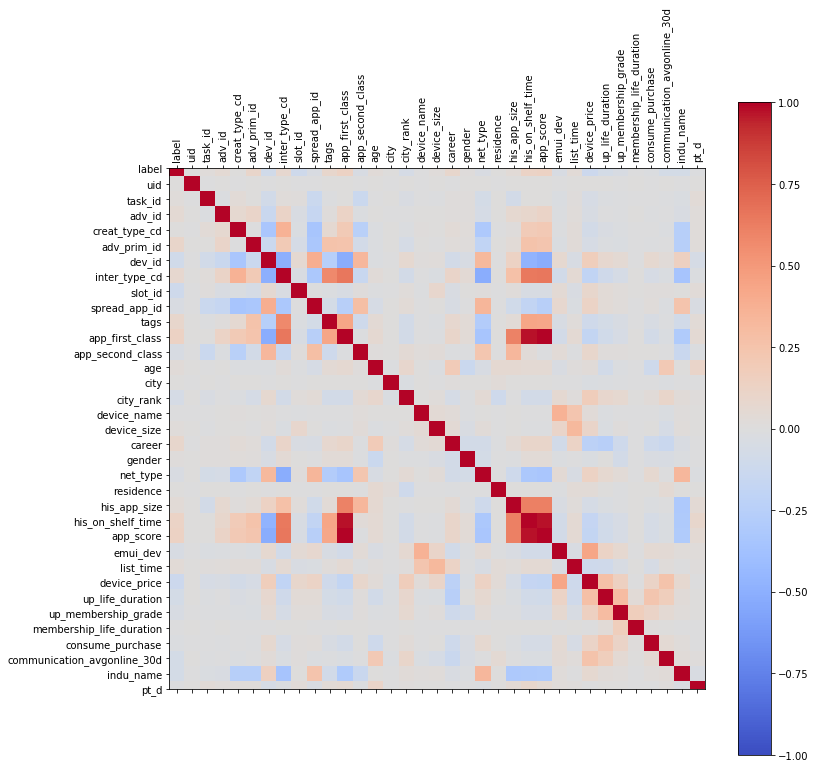

In [98]:
corr = df.corr()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [131]:
corr.loc[abs(corr['label'])>=0.1,['label']]

,label
label,1.000000
slot_id,-0.104075
app_first_class,0.127372
his_on_shelf_time,0.121202
app_score,0.126152
device_price,-0.122766


In [99]:


# Non Categorical Features: age, net_type, device_size, emui_dev, list_time, device_price, app_score
#                           consume_purchase, communication_avgonline_30d, pt_d, slot_id
#                           app_first_class, app_second_class



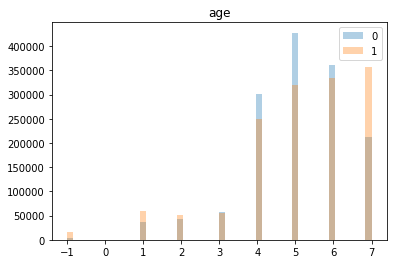

['Skewness = ', -1.0216487454493572]


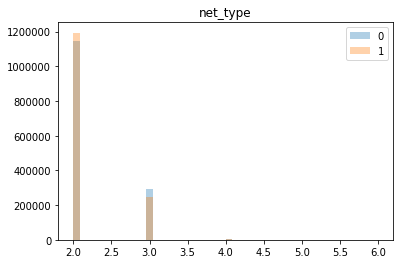

['Skewness = ', 1.9508799570697497]


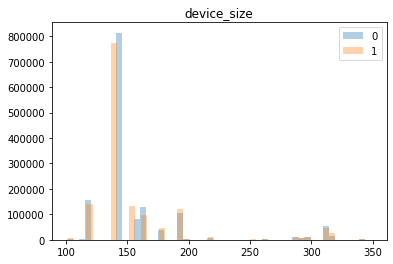

['Skewness = ', 2.380723543584734]


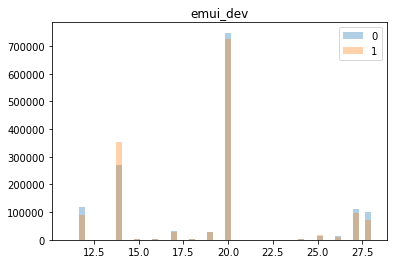

['Skewness = ', 0.30986918581294787]


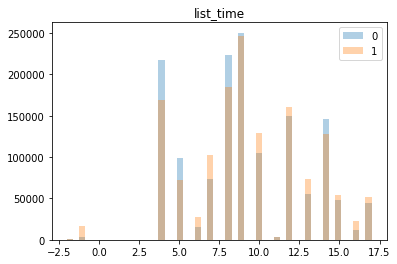

['Skewness = ', 0.07056061745627498]


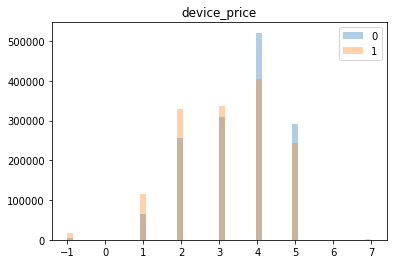

['Skewness = ', -0.4780185727204073]


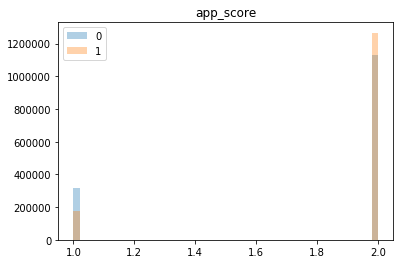

['Skewness = ', -1.746720532250589]


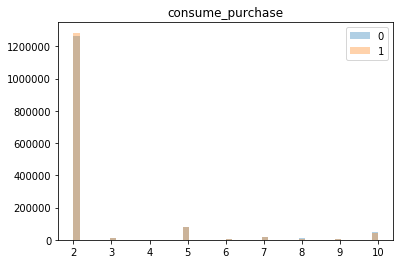

['Skewness = ', 3.3533407548884937]


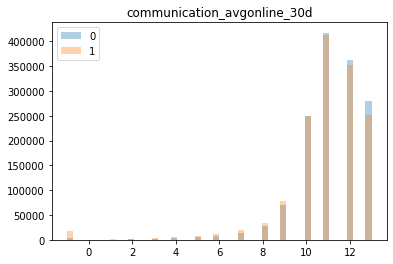

['Skewness = ', -2.7676099946959054]


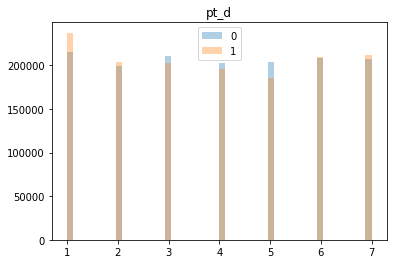

['Skewness = ', 0.014060057356090654]


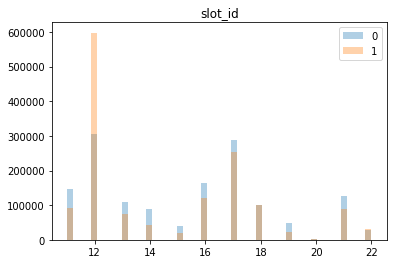

['Skewness = ', 0.5028259342919795]


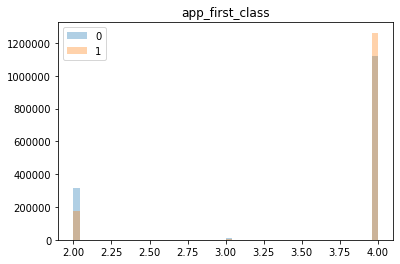

['Skewness = ', -1.7299148247468639]


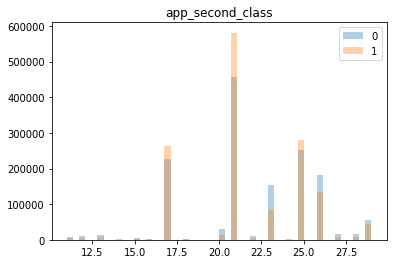

['Skewness = ', -0.280234919510829]


In [100]:
c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
df_c = df.loc[:,c]

for i in c:
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]

    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

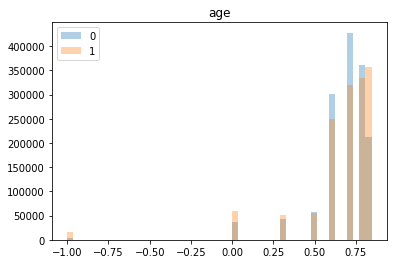

['Skewness = ', -3.848087683600629]


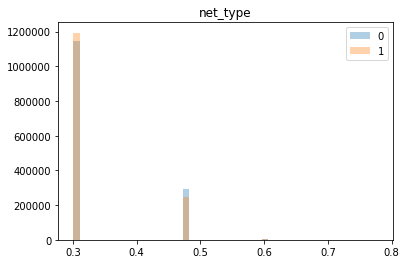

['Skewness = ', 1.7140600274405322]


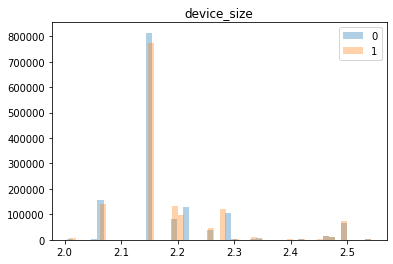

['Skewness = ', 1.7896236694386147]


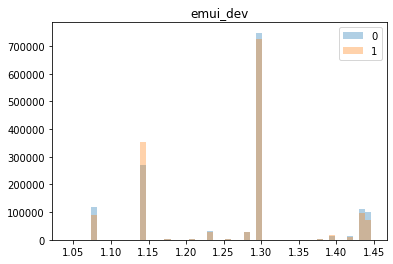

['Skewness = ', -0.1756129406405411]


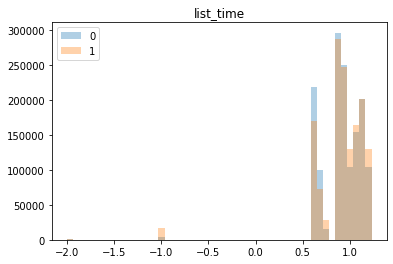

['Skewness = ', -4.00128943973117]


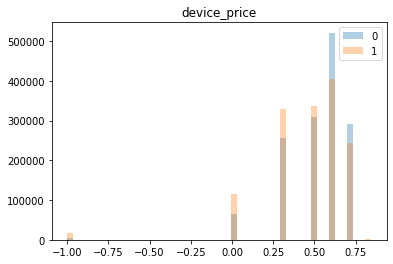

['Skewness = ', -2.5748931669993596]


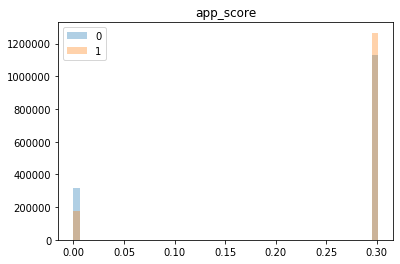

['Skewness = ', -1.746720532250591]


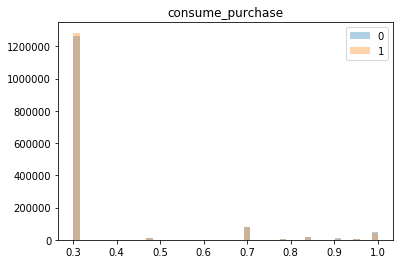

['Skewness = ', 2.801709282464753]


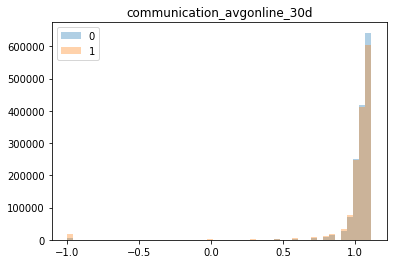

['Skewness = ', -8.938417835257175]


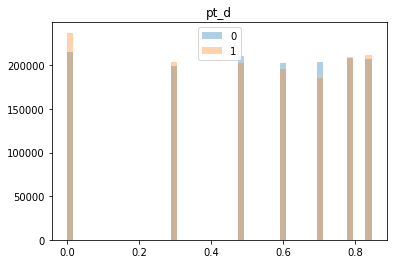

['Skewness = ', -0.697227699853603]


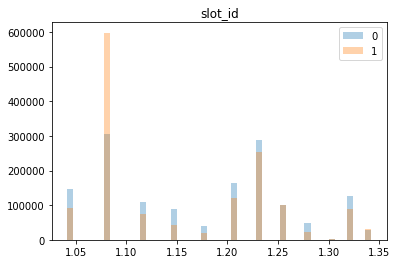

['Skewness = ', 0.2677143391771632]


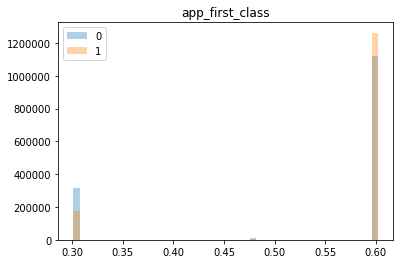

['Skewness = ', -1.7350134717830108]


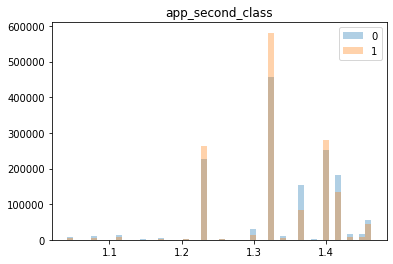

['Skewness = ', -0.8020211978876803]


In [101]:
import math

c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
df_c = df.loc[:,c]
for i in c:
    df_c[i] = df_c[i].apply(lambda x: math.log10(x) if x > 0 else x)
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]
    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

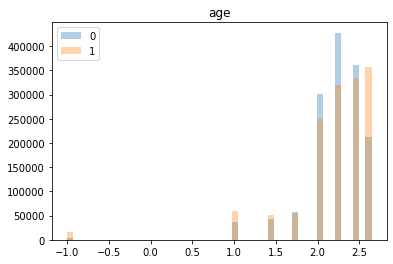

['Skewness = ', -3.0660040436440847]


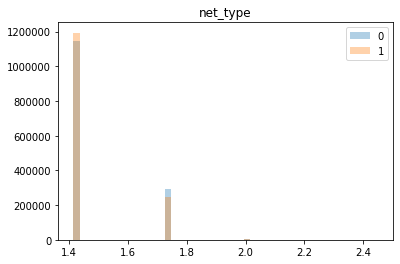

['Skewness = ', 1.8014925337322258]


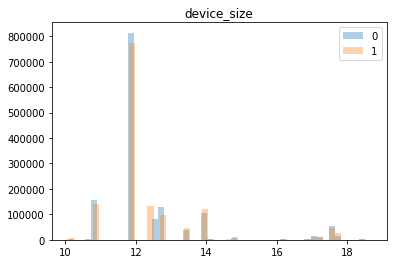

['Skewness = ', 2.102098886497706]


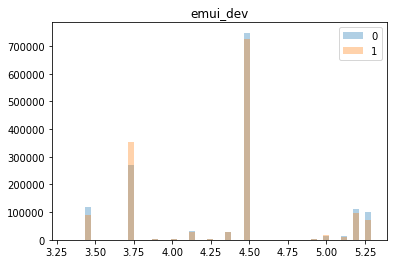

['Skewness = ', 0.06098716302429538]


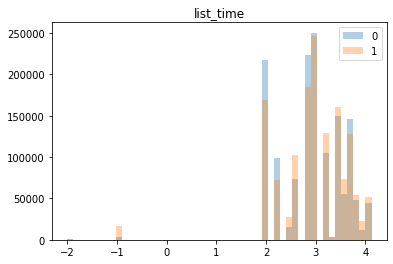

['Skewness = ', -1.5086405238015794]


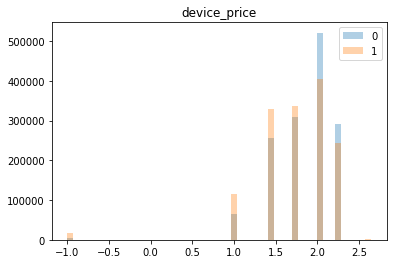

['Skewness = ', -2.3523975185212653]


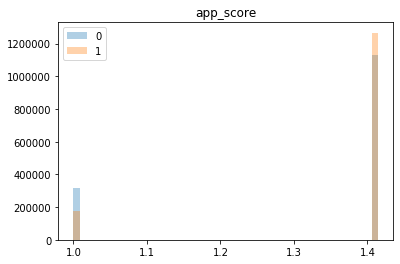

['Skewness = ', -1.7467205322505774]


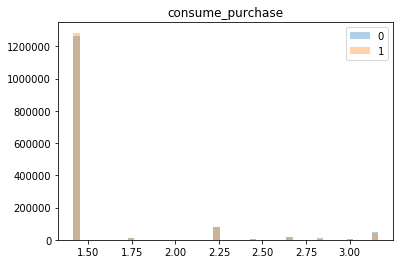

['Skewness = ', 3.045646817247931]


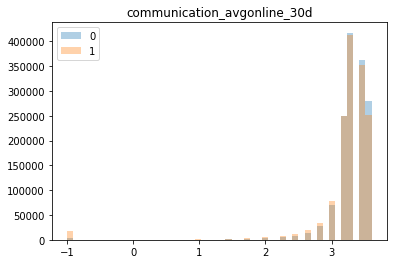

['Skewness = ', -6.727318580811917]


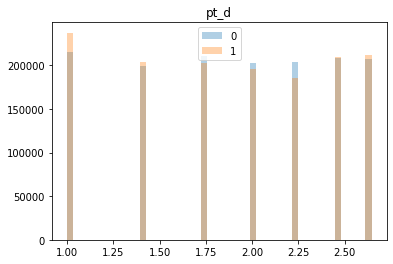

['Skewness = ', -0.32341358058381187]


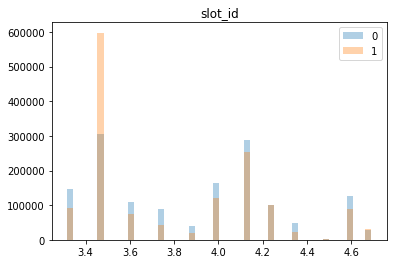

['Skewness = ', 0.38007513696418566]


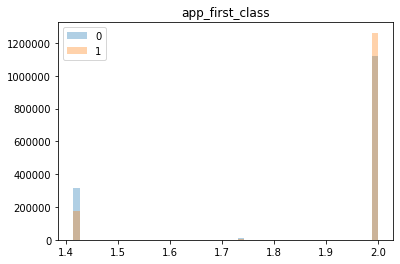

['Skewness = ', -1.7324864381911163]


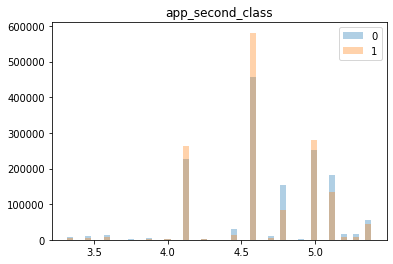

['Skewness = ', -0.5218848131729289]


In [102]:
c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
df_c = df.loc[:,c]
for i in c:
    df_c[i] = df_c[i].apply(lambda x: math.sqrt(x) if x > 0 else x)
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]
    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

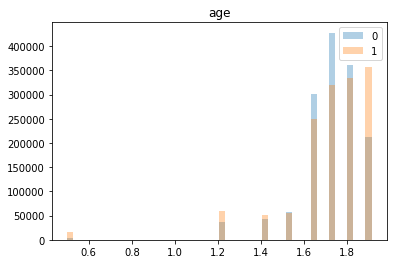

['Skewness = ', (-1.414564896209906+1.5573775921061008j)]


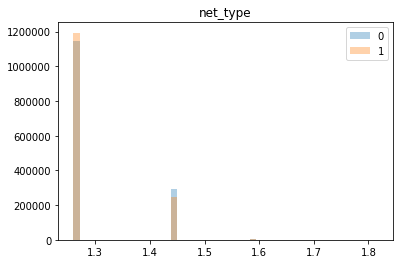

['Skewness = ', 1.767111591092876]


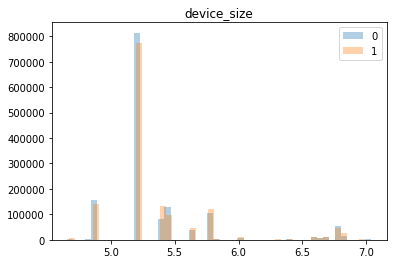

['Skewness = ', 2.0014222971392805]


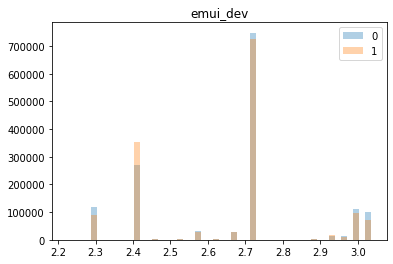

['Skewness = ', -0.01962573332909883]


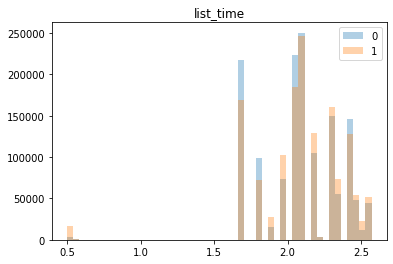

['Skewness = ', (-0.6270068246289788+1.3126456312202663j)]


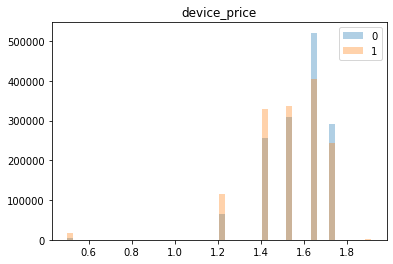

['Skewness = ', (-0.1874089888409842+1.4863289109645783j)]


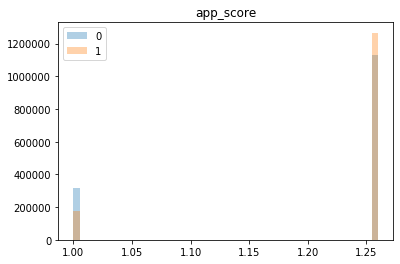

['Skewness = ', -1.7467205322506025]


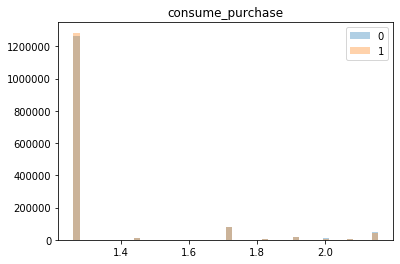

['Skewness = ', 2.9561307810303283]


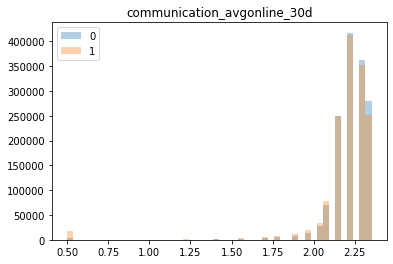

['Skewness = ', (-6.671274903968857+2.6474482055496837j)]


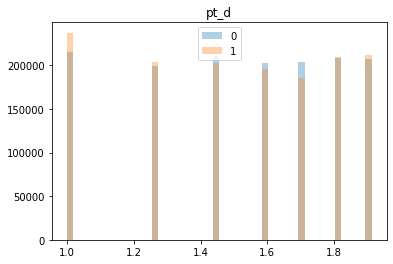

['Skewness = ', -0.44570660402948004]


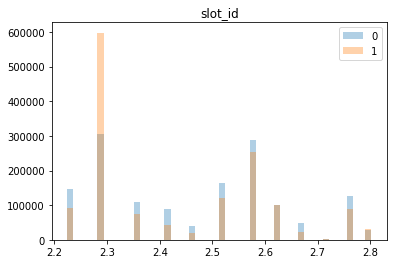

['Skewness = ', 0.3414821437886073]


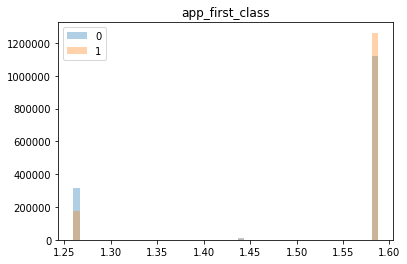

['Skewness = ', -1.7333374396726389]


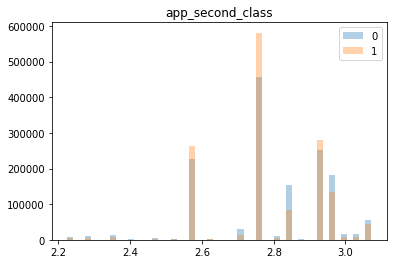

['Skewness = ', -0.6104013934574645]


In [103]:
c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
df_c = df.loc[:,c]
for i in c:
    df_c[i] = df_c[i].apply(lambda x: x**(1. /3.))
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]
    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

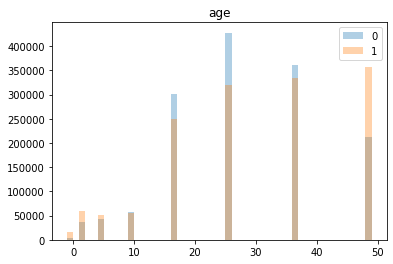

['Skewness = ', -0.057267604166317605]


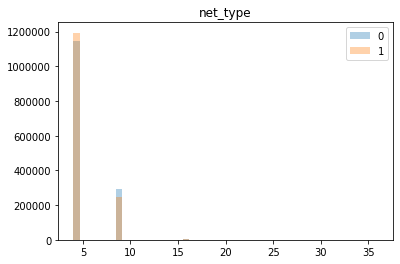

['Skewness = ', 2.6672174095534418]


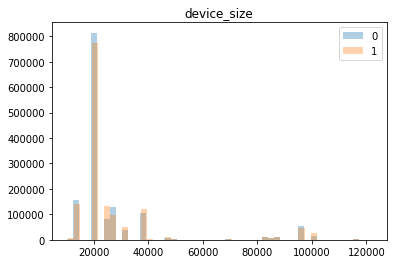

['Skewness = ', 2.82498770761795]


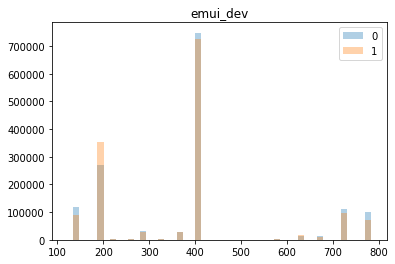

['Skewness = ', 0.8066063660575576]


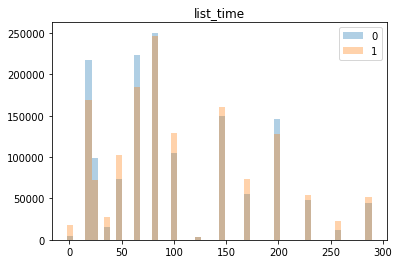

['Skewness = ', 0.8244693138231252]


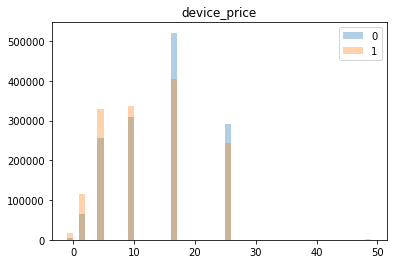

['Skewness = ', 0.27581528217614565]


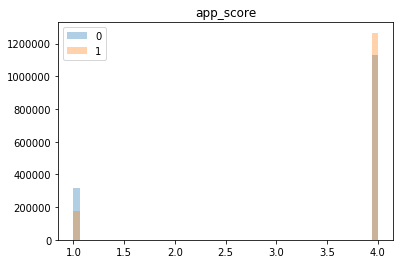

['Skewness = ', -1.7467205322505888]


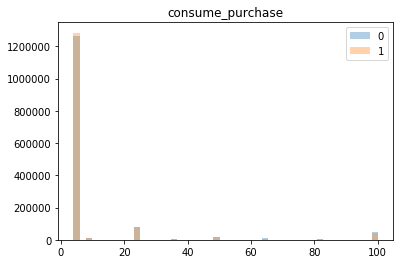

['Skewness = ', 4.0054277890780146]


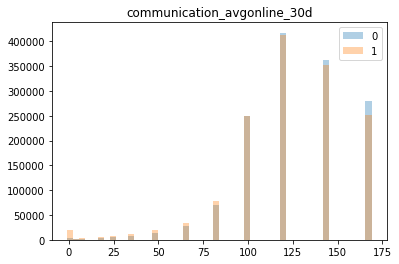

['Skewness = ', -0.9274578435275677]


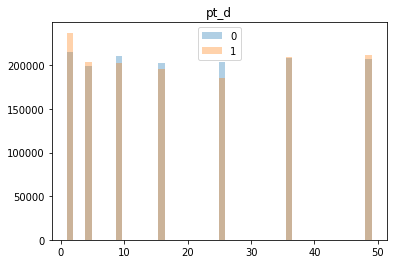

['Skewness = ', 0.5316443312105674]


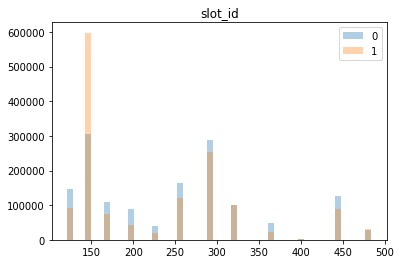

['Skewness = ', 0.7783433422203734]


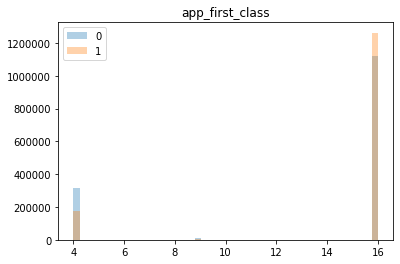

['Skewness = ', -1.7249329918107588]


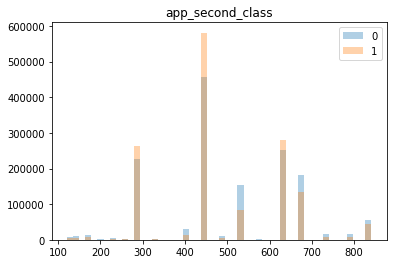

['Skewness = ', 0.12680894338113022]


In [104]:
c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
df_c = df.loc[:,c]
for i in c:
    df_c[i] = df_c[i].apply(lambda x: x**2 if x > 0 else x)
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]
    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

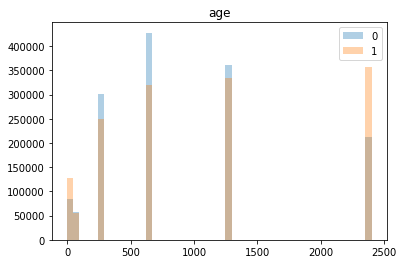

['Skewness = ', 0.6673717209724791]


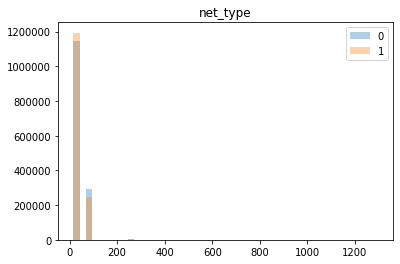

['Skewness = ', 10.65144635062026]


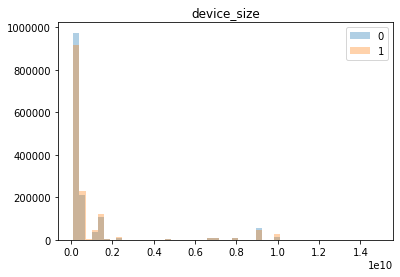

['Skewness = ', 3.342617449767953]


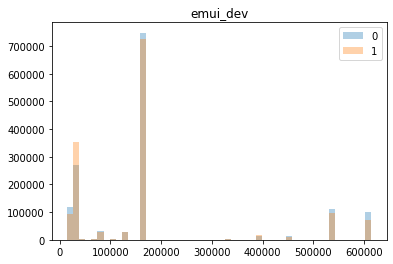

['Skewness = ', 1.5660326522011512]


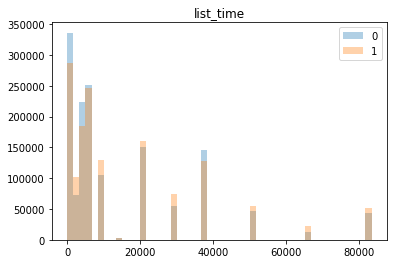

['Skewness = ', 1.8463862876673804]


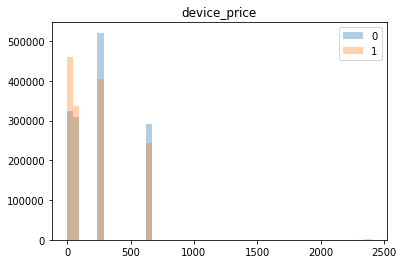

['Skewness = ', 1.3462926476052879]


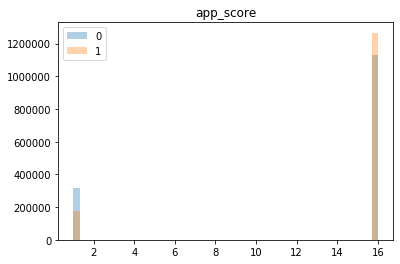

['Skewness = ', -1.7467205322505848]


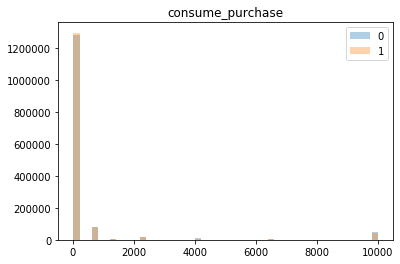

['Skewness = ', 4.765080994075551]


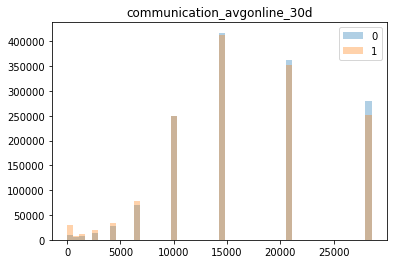

['Skewness = ', 0.044851841759821875]


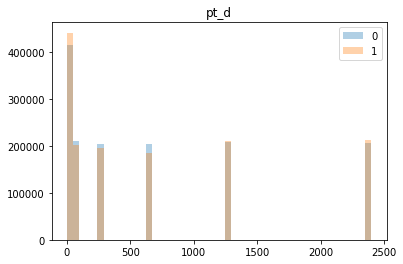

['Skewness = ', 1.1512447764634814]


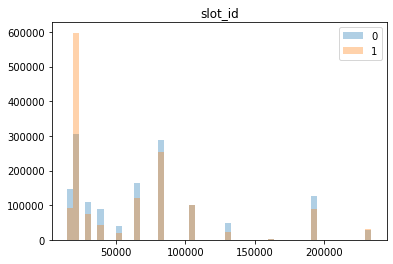

['Skewness = ', 1.4022643140389428]


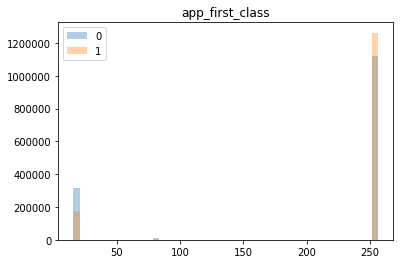

['Skewness = ', -1.7171127995743907]


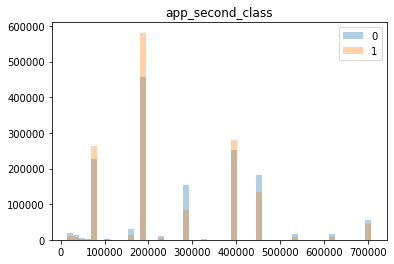

['Skewness = ', 0.7973095125582573]


In [105]:
c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
df_c = df.loc[:,c]
for i in c:
    df_c[i] = df_c[i].apply(lambda x: x**4 if x > 0 else x)
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]
    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

## RESULTADOS:
### x**2 : age, app_second_class, device_price
### x**4 : communication_avgonline_30d
### log10 : slot_id, net_type, device_size, cunsume_purchase
### cube root : emui_dev
### Nueva feature: (app_first_class * app_second_class)**2
### COINCIDEN: app_score y app_first_class y his_on_shlef_time

In [125]:
df_t = df.loc[:,['label','his_on_shelf_time', 'app_score', 'app_first_class']]
df_t['score*his'] = df_t['app_score']*(df_t['his_on_shelf_time'])
df_t['first*his'] = df_t['app_first_class']*(df_t['his_on_shelf_time'])

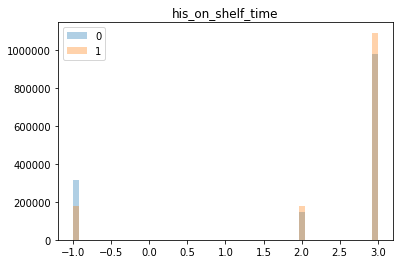

['Skewness = ', -1.598871785784385]


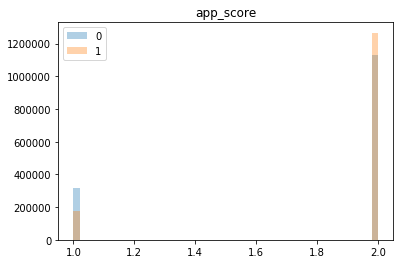

['Skewness = ', -1.746720532250589]


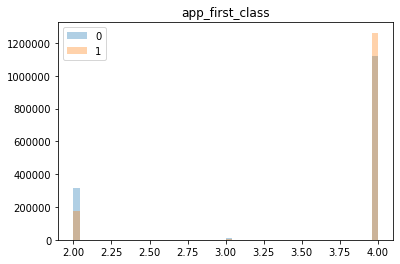

['Skewness = ', -1.7299148247468639]


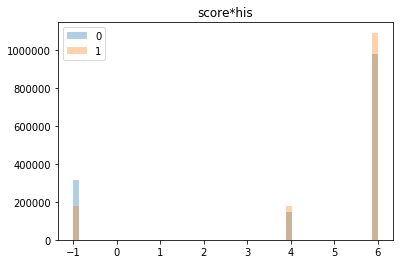

['Skewness = ', -1.5571291306361847]


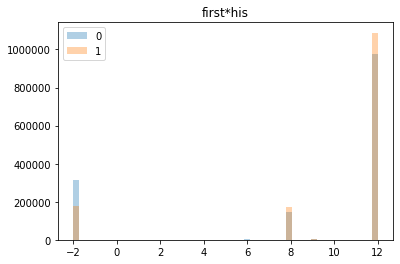

['Skewness = ', -1.5535468182457977]


In [126]:
c = ['his_on_shelf_time', 'app_score', 'app_first_class', 'score*his','first*his']
df_c = df_t.loc[:,c]

for i in c:
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]

    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

In [129]:
df_t = df.loc[:,['label','app_first_class', 'app_second_class']]
df_t['first*second'] = (df_t['app_first_class'])*(df_t['app_second_class'])
df_t['first*second2'] = df_t['first*second'].apply(lambda x: x**2)

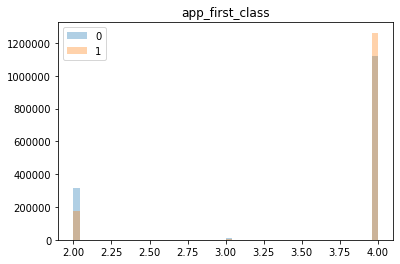

['Skewness = ', -1.7299148247468639]


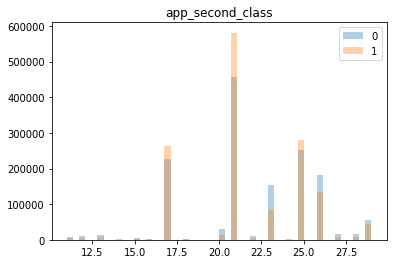

['Skewness = ', -0.280234919510829]


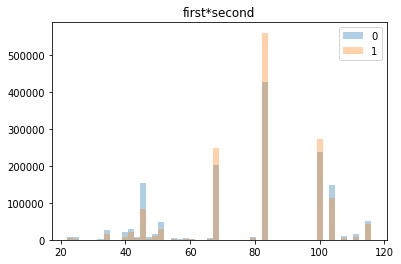

['Skewness = ', -0.5531207030256862]


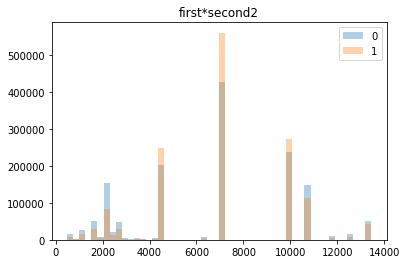

['Skewness = ', -0.04562930586448611]


In [130]:
c = ['app_first_class', 'app_second_class','first*second','first*second2']
df_c = df_t.loc[:,c]

for i in c:
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]

    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

## RESULTADOS

In [41]:
c = ['age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']
c2 = c
c2.append('label')
df = df.loc[:1000000,c2]

for i in c:
    if (len(df.loc[df[i]==-1, i])>0):
        str_c = "{}_-1".format(i)
        df_m1 = df[i].apply(lambda x: 1 if x == -1 else 0)
        df[i] = df[i].apply(lambda x: df.loc[df[i]>=0,i].mean() if x == -1 else x)
        df[str_c]= df_m1
    if (len(df.loc[df[i]==-2, i])>0):
        str_c2 = "{}_-2".format(i)
        df_m2 = df[i].apply(lambda x: 1 if x == -2 else 0)
        df[i] = df[i].apply(lambda x: df.loc[df[i]>=0,i].mean() if x == -2 else x)
        df[str_c2]= df_m2

In [42]:
import math
df['age'] = df['age'].apply(lambda x: x**2)
df['device_price'] = df['device_price'].apply(lambda x: x**2)
df['communication_avgonline_30d'] = df['communication_avgonline_30d'].apply(lambda x: x**4)
df['slot_id'] = df['slot_id'].apply(lambda x: math.log10(x))
df['net_type'] = df['net_type'].apply(lambda x: math.log10(x))
df['device_size'] = df['device_size'].apply(lambda x: math.log10(x))
df['consume_purchase'] = df['consume_purchase'].apply(lambda x: math.log10(x))
df['emui_dev'] = df['emui_dev'].apply(lambda x: x**(1. /3. ))
df['app_class'] = df['app_first_class']*df['app_second_class']
df['app_class'] = df['app_class'].apply(lambda x: x**2)

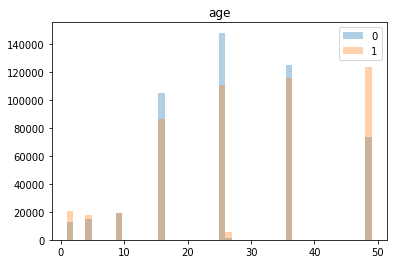

['Skewness = ', -0.03307502401280039]


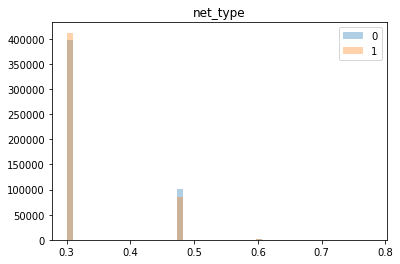

['Skewness = ', 1.7158008080514304]


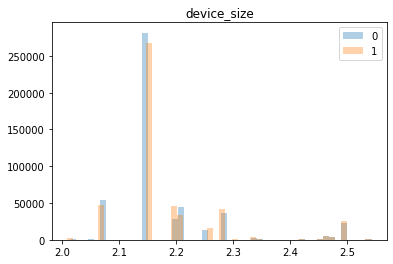

['Skewness = ', 1.7884948617344052]


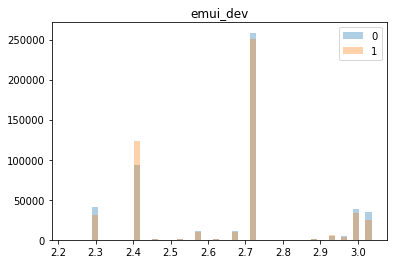

['Skewness = ', -0.019028620403726906]


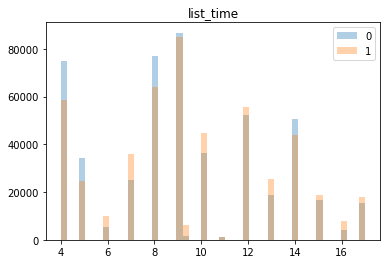

['Skewness = ', 0.19887173180211873]


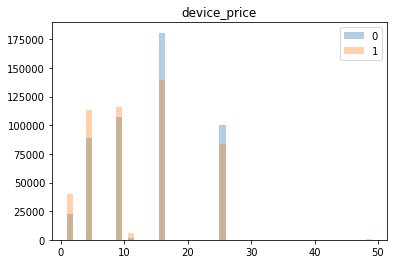

['Skewness = ', 0.2958383559445199]


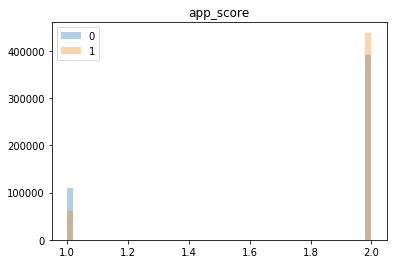

['Skewness = ', -1.750759101975312]


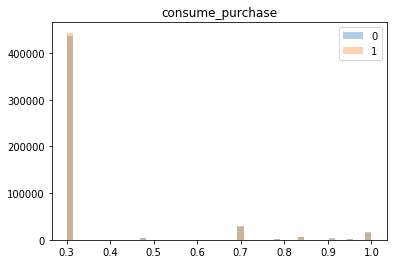

['Skewness = ', 2.7982030933656095]


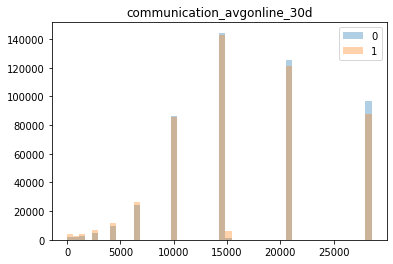

['Skewness = ', 0.08759269070123742]


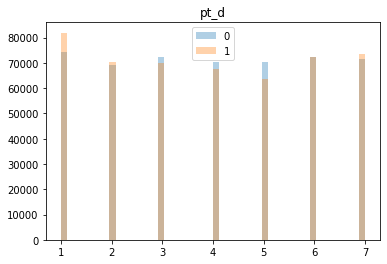

['Skewness = ', 0.014987159483050972]


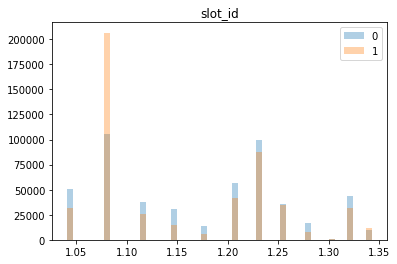

['Skewness = ', 0.2674050863655974]


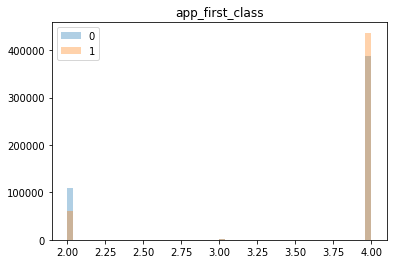

['Skewness = ', -1.7342701730953411]


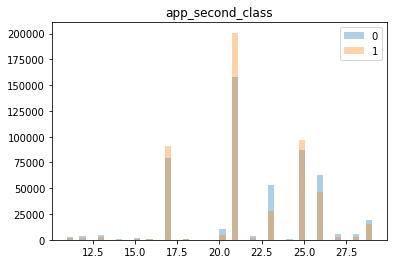

['Skewness = ', -0.2771272259395215]


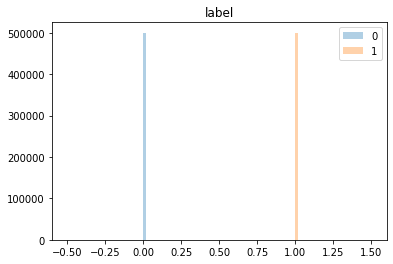

['Skewness = ', 0.001633998911338562]


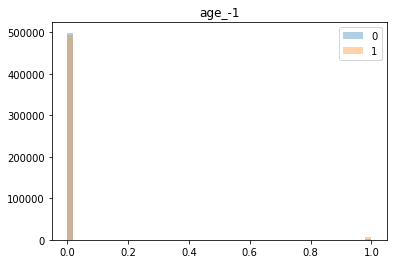

['Skewness = ', 11.706568321086847]


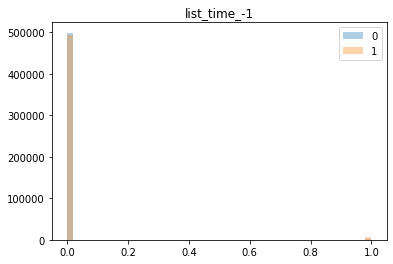

['Skewness = ', 11.706568321086847]


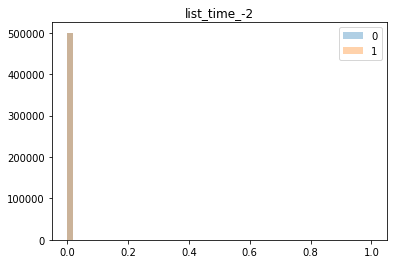

['Skewness = ', 41.66692632344367]


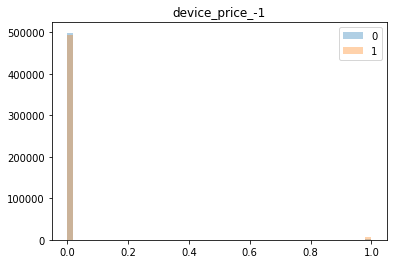

['Skewness = ', 11.706568321086847]


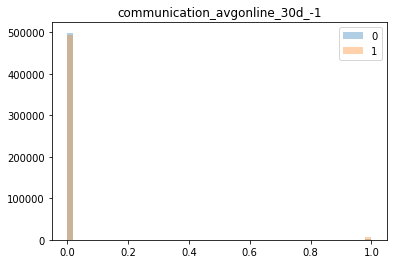

['Skewness = ', 11.323611903363826]


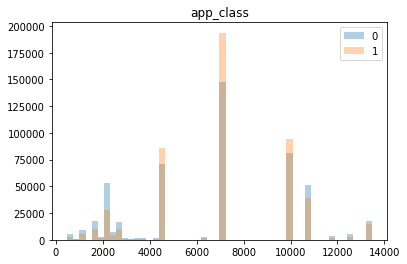

['Skewness = ', -0.04352793114535542]


In [47]:
for i in df.columns:
    s0 = df.loc[df['label']==0,i]
    s1 = df.loc[df['label']==1,i]

    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df[i], axis=0, bias=True)])

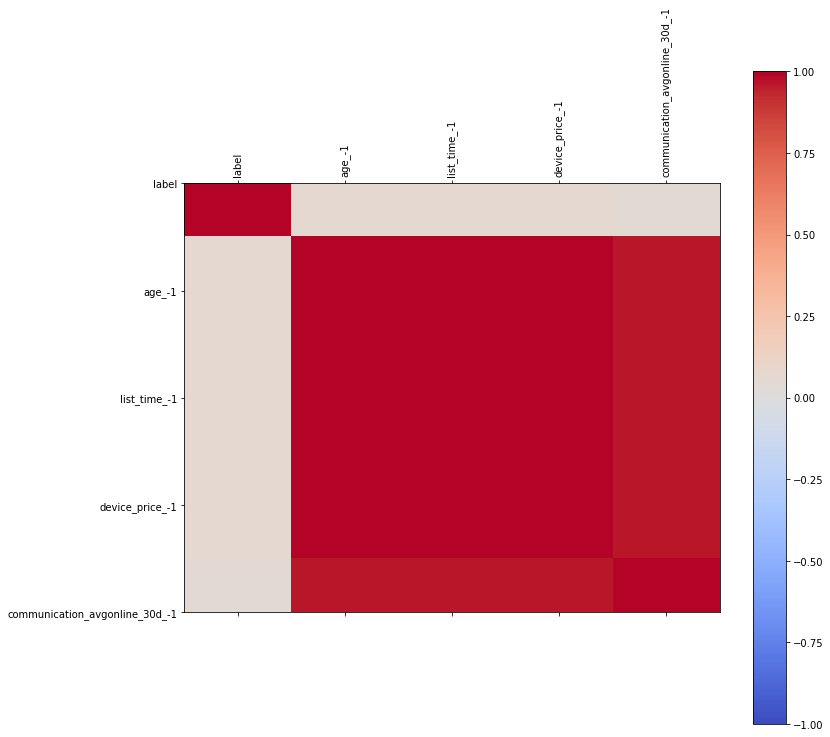

In [69]:
df1 = df[['label','age_-1','list_time_-1','device_price_-1', 'communication_avgonline_30d_-1']]
corr = df1.corr()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

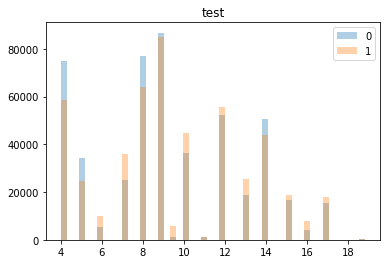

['Skewness = ', -0.04352793114535542]


In [74]:
df_t = df.loc[:,:]
df_t['test'] = df['list_time']*(df['list_time_-2']+1)
s0 = df_t.loc[df_t['label']==0,'test']
s1 = df_t.loc[df_t['label']==1,'test']

plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
plt.legend(loc='best')
plt.title('test')
plt.show()
print(['Skewness = ' , skew(df[i], axis=0, bias=True)])

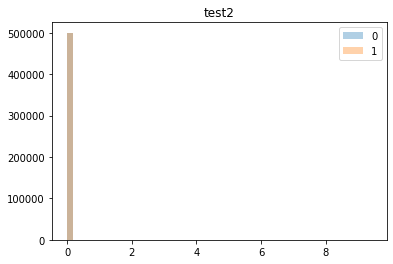

['Skewness = ', -0.04352793114535542]


In [77]:
df_t['test2'] = df_t['test']-df_t['list_time']
s0 = df_t.loc[df_t['label']==0,'test2']
s1 = df_t.loc[df_t['label']==1,'test2']

plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
plt.legend(loc='best')
plt.title('test2')
plt.show()
print(['Skewness = ' , skew(df[i], axis=0, bias=True)])

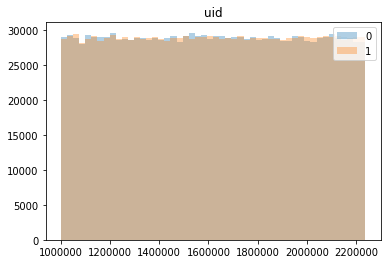

['Skewness = ', 0.0007632887468636483]


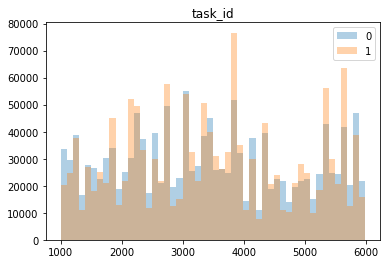

['Skewness = ', 0.09784858388337483]


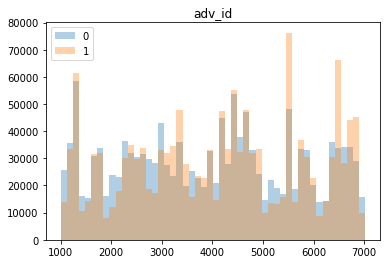

['Skewness = ', -0.02745689829161932]


In [5]:
c = ['uid', 'task_id', 'adv_id']
df_c = df.loc[:,c]

for i in c:
    s0 = df_c.loc[df['label']==0,i]
    s1 = df_c.loc[df['label']==1,i]

    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df_c[i], axis=0, bias=True)])

In [6]:
X = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']
y=np.array(y).ravel()

In [7]:
import category_encoders as ce

encoder1 = ce.CountEncoder()

encoder2 = ce.TargetEncoder()

df1 = encoder1.fit_transform(df[c])
df2 = encoder2.fit_transform(df[c], df['label'])

df1

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
df2

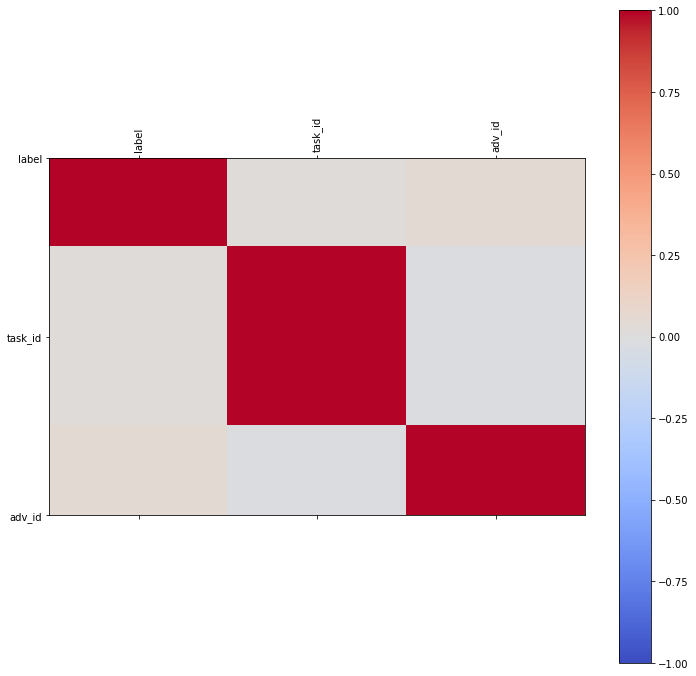

In [5]:
df1 = df[['label','task_id','adv_id']]
corr = df1.corr()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

In [5]:
df1 = df[['label','task_id','adv_id']]
df1

,label,task_id,adv_id
0,0,1993,5405
1,1,1817,2242
2,1,4400,2476
3,0,3420,4680
4,0,2229,5483
...,...,...,...
2890971,0,1847,6428
2890972,1,4186,4007
2890973,0,3825,4260
2890974,0,3069,1777


In [6]:
df1 = df1.iloc[:1000, :]
df1 = pd.get_dummies(df1, columns=['task_id','adv_id'])

In [7]:
df1

,label,task_id_1007,task_id_1028,task_id_1046,task_id_1053,task_id_1054,task_id_1065,task_id_1086,task_id_1098,task_id_1099,task_id_1102,task_id_1141,task_id_1147,task_id_1152,task_id_1158,task_id_1175,task_id_1177,task_id_1180,task_id_1184,task_id_1185,task_id_1193,task_id_1217,task_id_1220,task_id_1223,task_id_1225,task_id_1237,task_id_1245,task_id_1275,task_id_1282,task_id_1329,task_id_1343,task_id_1366,task_id_1367,task_id_1372,task_id_1374,task_id_1378,task_id_1390,task_id_1400,task_id_1401,task_id_1405,task_id_1446,task_id_1448,task_id_1450,task_id_1452,task_id_1460,task_id_1471,task_id_1473,task_id_1482,task_id_1483,task_id_1511,task_id_1519,task_id_1520,task_id_1524,task_id_1549,task_id_1551,task_id_1555,task_id_1557,task_id_1558,task_id_1575,task_id_1587,task_id_1597,task_id_1602,task_id_1610,task_id_1627,task_id_1637,task_id_1648,task_id_1669,task_id_1689,task_id_1704,task_id_1711,task_id_1715,task_id_1731,task_id_1736,task_id_1758,task_id_1762,task_id_1781,task_id_1786,task_id_1799,task_id_1808,task_id_1813,task_id_1817,task_id_1834,task_id_1837,task_id_1842,task_id_1847,task_id_1860,task_id_1875,task_id_1922,task_id_1951,task_id_1976,task_id_1981,task_id_1991,task_id_1992,task_id_1993,task_id_2018,task_id_2019,task_id_2023,task_id_2031,task_id_2063,task_id_2082,task_id_2088,task_id_2093,task_id_2101,task_id_2105,task_id_2112,task_id_2122,task_id_2157,task_id_2183,task_id_2195,task_id_2198,task_id_2205,task_id_2212,task_id_2215,task_id_2221,task_id_2226,task_id_2229,task_id_2236,task_id_2244,task_id_2250,task_id_2269,task_id_2306,task_id_2325,task_id_2336,task_id_2342,task_id_2355,task_id_2363,task_id_2366,task_id_2375,task_id_2377,task_id_2389,task_id_2396,task_id_2402,task_id_2403,task_id_2412,task_id_2434,task_id_2438,task_id_2458,task_id_2460,task_id_2462,task_id_2475,task_id_2485,task_id_2500,task_id_2502,task_id_2517,task_id_2530,task_id_2531,task_id_2553,task_id_2572,task_id_2574,task_id_2591,task_id_2610,task_id_2621,task_id_2639,task_id_2640,task_id_2642,task_id_2652,task_id_2671,task_id_2675,task_id_2692,task_id_2694,task_id_2709,task_id_2716,task_id_2722,task_id_2727,task_id_2731,task_id_2732,task_id_2733,task_id_2748,task_id_2753,task_id_2760,task_id_2763,task_id_2766,task_id_2784,task_id_2785,task_id_2803,task_id_2804,task_id_2807,task_id_2824,task_id_2855,task_id_2856,task_id_2866,task_id_2874,task_id_2885,task_id_2887,task_id_2891,task_id_2908,task_id_2926,task_id_2946,task_id_2951,task_id_2954,task_id_2974,task_id_2978,task_id_2983,task_id_2990,task_id_2991,task_id_3006,task_id_3007,task_id_3012,task_id_3025,task_id_3031,task_id_3040,task_id_3047,task_id_3069,task_id_3071,task_id_3075,task_id_3084,task_id_3102,task_id_3104,task_id_3119,task_id_3122,task_id_3139,task_id_3143,task_id_3150,task_id_3162,task_id_3169,task_id_3218,task_id_3225,task_id_3231,task_id_3238,task_id_3249,task_id_3254,task_id_3255,task_id_3263,task_id_3279,task_id_3292,task_id_3316,task_id_3317,task_id_3326,task_id_3330,task_id_3346,task_id_3352,task_id_3353,task_id_3357,task_id_3372,task_id_3376,task_id_3385,task_id_3387,task_id_3401,task_id_3408,task_id_3420,task_id_3434,task_id_3439,task_id_3445,task_id_3454,task_id_3476,task_id_3477,task_id_3494,task_id_3519,task_id_3521,task_id_3522,task_id_3536,task_id_3547,task_id_3577,task_id_3606,task_id_3614,task_id_3622,task_id_3637,task_id_3649,task_id_3653,task_id_3663,task_id_3690,task_id_3697,task_id_3711,task_id_3724,task_id_3733,task_id_3739,task_id_3744,task_id_3747,task_id_3793,task_id_3816,task_id_3821,task_id_3826,task_id_3854,task_id_3868,task_id_3869,task_id_3903,task_id_3905,task_id_3910,task_id_3920,task_id_3927,task_id_3945,task_id_3953,task_id_3960,task_id_3977,task_id_3978,task_id_3979,task_id_3994,task_id_4014,task_id_4020,task_id_4021,task_id_4045,task_id_4075,task_id_4084,task_id_4100,task_id_4102,task_id_4125,task_id_4129,task_id_4161,task_id_4180,task_id_4186,task_id_4189,task_id_4191,task_id_4245,task_id_4261,task_id_4263,task_id_4265,task_id_4305,task_id_4310,ta

In [8]:
corr_matrix = df1.corr()

for i in range(len(corr_matrix.columns)):
    if (len(corr_matrix.loc[abs(corr_matrix[corr_matrix.columns[i]])>=0.9,corr_matrix.columns[i]]) > 1):
            print(corr_matrix.loc[abs(corr_matrix[corr_matrix.columns[i]])>=0.9,corr_matrix.columns[i]])

task_id_1007    1.0
adv_id_6572     1.0
Name: task_id_1007, dtype: float64
task_id_1028    1.0
adv_id_5108     1.0
Name: task_id_1028, dtype: float64
task_id_1046    1.0
adv_id_4442     1.0
Name: task_id_1046, dtype: float64
task_id_1053    1.0
adv_id_4235     1.0
Name: task_id_1053, dtype: float64
task_id_1054    1.0
adv_id_1325     1.0
Name: task_id_1054, dtype: float64
task_id_1065    1.0
adv_id_4854     1.0
Name: task_id_1065, dtype: float64
task_id_1098    1.0
adv_id_1732     1.0
Name: task_id_1098, dtype: float64
task_id_1099    1.0
adv_id_1929     1.0
Name: task_id_1099, dtype: float64
task_id_1102    1.0
adv_id_4179     1.0
Name: task_id_1102, dtype: float64
task_id_1141    1.0
adv_id_2855     1.0
Name: task_id_1141, dtype: float64
task_id_1147    1.0
adv_id_2931     1.0
Name: task_id_1147, dtype: float64
task_id_1152    1.0
adv_id_1258     1.0
Name: task_id_1152, dtype: float64
task_id_1158    1.0
adv_id_3156     1.0
Name: task_id_1158, dtype: float64
task_id_1175    1.0
adv_i

Name: task_id_2325, dtype: float64
task_id_2336    1.0
adv_id_4517     1.0
Name: task_id_2336, dtype: float64
task_id_2342    1.0
adv_id_2311     1.0
Name: task_id_2342, dtype: float64
task_id_2355    1.0
adv_id_6418     1.0
Name: task_id_2355, dtype: float64
task_id_2363    1.0
adv_id_2537     1.0
Name: task_id_2363, dtype: float64
task_id_2366    1.0
adv_id_3431     1.0
Name: task_id_2366, dtype: float64
task_id_2375    1.0
adv_id_1814     1.0
Name: task_id_2375, dtype: float64
task_id_2377    1.0
adv_id_6556     1.0
Name: task_id_2377, dtype: float64
task_id_2389    1.0
adv_id_5768     1.0
Name: task_id_2389, dtype: float64
task_id_2396    1.0
adv_id_6853     1.0
Name: task_id_2396, dtype: float64
task_id_2402    1.0
adv_id_1713     1.0
Name: task_id_2402, dtype: float64
task_id_2403    1.0
adv_id_6304     1.0
Name: task_id_2403, dtype: float64
task_id_2412    1.0
adv_id_4230     1.0
Name: task_id_2412, dtype: float64
task_id_2438    1.0
adv_id_1618     1.0
Name: task_id_2438, dtype

task_id_3445    1.0
adv_id_1102     1.0
Name: task_id_3445, dtype: float64
task_id_3454    1.0
adv_id_2610     1.0
Name: task_id_3454, dtype: float64
task_id_3476    1.0
adv_id_4937     1.0
Name: task_id_3476, dtype: float64
task_id_3477    1.0
adv_id_6765     1.0
Name: task_id_3477, dtype: float64
task_id_3494    1.0
adv_id_4779     1.0
Name: task_id_3494, dtype: float64
task_id_3519    1.0
adv_id_1150     1.0
Name: task_id_3519, dtype: float64
task_id_3521    1.0
adv_id_4075     1.0
Name: task_id_3521, dtype: float64
task_id_3522    1.0
adv_id_5534     1.0
Name: task_id_3522, dtype: float64
task_id_3536    1.0
adv_id_1365     1.0
Name: task_id_3536, dtype: float64
task_id_3547    1.0
adv_id_2061     1.0
Name: task_id_3547, dtype: float64
task_id_3577    1.0
adv_id_5884     1.0
Name: task_id_3577, dtype: float64
task_id_3606    1.0
adv_id_5019     1.0
Name: task_id_3606, dtype: float64
task_id_3614    1.0
adv_id_3892     1.0
Name: task_id_3614, dtype: float64
task_id_3622    1.0
adv_i

task_id_5360    1.0
adv_id_4918     1.0
Name: task_id_5360, dtype: float64
task_id_5372    1.0
adv_id_3899     1.0
Name: task_id_5372, dtype: float64
task_id_5382    1.0
adv_id_1250     1.0
Name: task_id_5382, dtype: float64
task_id_5383    1.0
adv_id_5672     1.0
Name: task_id_5383, dtype: float64
task_id_5390    1.0
adv_id_1226     1.0
Name: task_id_5390, dtype: float64
task_id_5397    1.0
adv_id_3575     1.0
Name: task_id_5397, dtype: float64
task_id_5404    1.0
adv_id_1303     1.0
Name: task_id_5404, dtype: float64
task_id_5420    1.0
adv_id_3971     1.0
Name: task_id_5420, dtype: float64
task_id_5456    1.0
adv_id_2425     1.0
Name: task_id_5456, dtype: float64
task_id_5489    1.0
adv_id_4857     1.0
Name: task_id_5489, dtype: float64
task_id_5490    1.0
adv_id_5397     1.0
Name: task_id_5490, dtype: float64
task_id_5511    1.0
adv_id_3152     1.0
Name: task_id_5511, dtype: float64
task_id_5527    1.0
adv_id_1036     1.0
Name: task_id_5527, dtype: float64
task_id_5557    1.0
adv_i

task_id_1460    1.0
adv_id_1974     1.0
Name: adv_id_1974, dtype: float64
task_id_2692    1.0
adv_id_2010     1.0
Name: adv_id_2010, dtype: float64
task_id_5845    1.0
adv_id_2039     1.0
Name: adv_id_2039, dtype: float64
task_id_3547    1.0
adv_id_2061     1.0
Name: adv_id_2061, dtype: float64
task_id_1689    1.0
adv_id_2069     1.0
Name: adv_id_2069, dtype: float64
task_id_4129    1.0
adv_id_2077     1.0
Name: adv_id_2077, dtype: float64
task_id_4891    1.0
adv_id_2110     1.0
Name: adv_id_2110, dtype: float64
task_id_4265    1.0
adv_id_2140     1.0
Name: adv_id_2140, dtype: float64
task_id_3653    1.0
adv_id_2156     1.0
Name: adv_id_2156, dtype: float64
task_id_4395    1.0
adv_id_2164     1.0
Name: adv_id_2164, dtype: float64
task_id_3007    1.0
adv_id_2167     1.0
Name: adv_id_2167, dtype: float64
task_id_4806    1.0
adv_id_2176     1.0
Name: adv_id_2176, dtype: float64
task_id_1704    1.0
adv_id_2184     1.0
Name: adv_id_2184, dtype: float64
task_id_4403    1.0
adv_id_2196     1.

task_id_5596    1.0
adv_id_4147     1.0
Name: adv_id_4147, dtype: float64
task_id_5952    1.0
adv_id_4158     1.0
Name: adv_id_4158, dtype: float64
task_id_1610    1.0
adv_id_4160     1.0
Name: adv_id_4160, dtype: float64
task_id_5863    1.0
adv_id_4164     1.0
Name: adv_id_4164, dtype: float64
task_id_2926    1.0
adv_id_4168     1.0
Name: adv_id_4168, dtype: float64
task_id_3231    1.0
adv_id_4172     1.0
Name: adv_id_4172, dtype: float64
task_id_4574    1.0
adv_id_4173     1.0
Name: adv_id_4173, dtype: float64
task_id_1102    1.0
adv_id_4179     1.0
Name: adv_id_4179, dtype: float64
task_id_5890    1.0
adv_id_4183     1.0
Name: adv_id_4183, dtype: float64
task_id_1627    1.0
adv_id_4205     1.0
Name: adv_id_4205, dtype: float64
task_id_5179    1.0
adv_id_4206     1.0
Name: adv_id_4206, dtype: float64
task_id_4361    1.0
adv_id_4221     1.0
Name: adv_id_4221, dtype: float64
task_id_2412    1.0
adv_id_4230     1.0
Name: adv_id_4230, dtype: float64
task_id_1053    1.0
adv_id_4235     1.

task_id_4245    1.0
adv_id_5687     1.0
Name: adv_id_5687, dtype: float64
task_id_3317    1.0
adv_id_5708     1.0
Name: adv_id_5708, dtype: float64
task_id_4335    1.0
adv_id_5710     1.0
Name: adv_id_5710, dtype: float64
task_id_2553    1.0
adv_id_5721     1.0
Name: adv_id_5721, dtype: float64
task_id_2502    1.0
adv_id_5732     1.0
Name: adv_id_5732, dtype: float64
task_id_5829    1.0
adv_id_5744     1.0
Name: adv_id_5744, dtype: float64
task_id_2389    1.0
adv_id_5768     1.0
Name: adv_id_5768, dtype: float64
task_id_1860    1.0
adv_id_5772     1.0
Name: adv_id_5772, dtype: float64
task_id_1185    1.0
adv_id_5806     1.0
Name: adv_id_5806, dtype: float64
task_id_1555    1.0
adv_id_5813     1.0
Name: adv_id_5813, dtype: float64
task_id_1551    1.0
adv_id_5843     1.0
Name: adv_id_5843, dtype: float64
task_id_4784    1.0
adv_id_5861     1.0
Name: adv_id_5861, dtype: float64
task_id_3577    1.0
adv_id_5884     1.0
Name: adv_id_5884, dtype: float64
task_id_3119    1.0
adv_id_5897     1.

# Feature Selection

In [10]:
X = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']
y = np.array(y).ravel()

In [11]:
X

,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d
0,1486116,1993,5405,7,207,17,5,12,13,37,4,21,5,-50,3,87,117,8,2,2,41,4,3,2,28,5,4,20,1,-1,2,12,17,7
1,1973268,1817,2242,3,210,70,4,17,88,40,4,25,5,-71,4,16,141,4,2,3,15,16,3,2,27,4,5,20,-1,-1,6,5,27,3
2,2045003,4400,2476,7,183,29,5,21,86,37,4,21,4,-97,3,46,141,9,2,2,42,4,3,2,14,10,3,18,-1,-1,2,12,17,1
3,1538596,3420,4680,8,142,36,5,12,80,41,4,26,7,-7,3,80,156,9,2,2,19,5,3,2,14,7,1,18,-1,-1,2,11,42,3
4,1879741,2229,5483,7,156,56,5,12,58,37,4,21,7,-75,5,80,156,4,2,2,28,14,3,2,14,7,1,18,-1,-1,2,11,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890971,1349053,1847,6428,6,178,17,5,18,70,39,4,17,5,-128,3,92,193,9,2,2,45,2,3,2,17,14,4,20,-1,-1,2,10,36,7
2890972,1610576,4186,4007,7,130,30,4,12,28,39,4,17,5,34,4,99,141,4,2,3,45,6,2,2,20,12,2,-1,-1,-1,2,13,36,7
2890973,1341066,3825,4260,7,186,33,5,17,85,19,4,12,4,-93,4,46,141,9,2,3,46,13,3,2,14,10,3,20,-1,-1,2,10,13,6
2890974,1222867,3069,1777,3,155,39,5,17,59,41,4,26,6,-93,4,32,141,4,2,3,46,14,2,2,14,4,5,20,-1,-1,5,11,26,2


## Regression Feature Selection: 
### (Numerical Input, Numerical Output)

In [12]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
#X_selected = fs.fit_transform(X, y)

fit = fs.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[5.880e+00 9.896e+02 6.772e+03 1.440e+02 2.826e+04 2.347e+04 1.461e+04
 3.166e+04 3.059e+03 2.298e+04 4.768e+04 4.866e+03 1.921e+03 5.822e+01
 1.083e+04 8.743e+00 1.530e+03 2.551e+04 2.280e+02 4.199e+03 1.198e+01
 3.813e+03 4.310e+04 4.675e+04 5.938e+03 3.502e+03 4.424e+04 1.183e+04
 5.347e+03 7.932e-01 1.137e+03 1.258e+04 1.382e+04 3.841e+02]
[[207  17   5  12  37   4   8   3   2   4]
 [210  70   4  17  40   4   4   3   2   5]
 [183  29   5  21  37   4   9   3   2   3]
 [142  36   5  12  41   4   9   3   2   1]
 [156  56   5  12  37   4   4   3   2   1]]


## Classification Feature Selection:
### (Numerical Input, Categorical Output)

In [21]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
#X_selected = fs.fit_transform(X, y)

fit = fs.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[-9.822e-01  1.019e+03  6.602e+03  2.319e+02  2.577e+04  2.347e+04
  9.807e+05  2.940e+04  3.141e+03  1.680e+04  4.773e+04  3.517e+03
  2.205e+03  5.812e+01  1.425e+04  2.480e+01  1.743e+03  2.736e+04
  2.288e+02  4.199e+03  1.278e+01  3.884e+03  4.310e+04  4.675e+04
  7.770e+03  3.644e+03  4.534e+04  1.234e+04  5.347e+03  8.049e-01
  1.136e+03  1.175e+04  1.286e+04  4.074e+02]
[[207  17   5  12  37   4   8   3   2   4]
 [210  70   4  17  40   4   4   3   2   5]
 [183  29   5  21  37   4   9   3   2   3]
 [142  36   5  12  41   4   9   3   2   1]
 [156  56   5  12  37   4   4   3   2   1]]


## Principal Component Analysis

In [15]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.000e+00 2.324e-05 1.562e-05]
[[ 1.000e+00 -2.303e-06  2.794e-06 -1.110e-09  1.013e-07 -2.225e-08
   1.263e-09 -2.287e-09 -8.806e-08  2.739e-08  2.979e-09 -7.995e-09
   1.797e-09 -9.072e-08  1.176e-09 -2.813e-08  1.129e-07 -2.799e-09
   3.470e-09  2.107e-10 -8.816e-08  1.119e-08  4.771e-09  1.410e-09
  -1.303e-08  1.568e-08  9.426e-10  1.569e-08 -8.882e-10  7.061e-10
  -6.706e-09  1.250e-08 -9.510e-09  7.072e-09]
 [ 2.902e-06  4.834e-02 -9.988e-01 -4.762e-05 -2.000e-03  1.385e-03
  -4.347e-05  6.547e-05  2.325e-03 -6.415e-05 -5.203e-05  3.609e-05
  -1.592e-06  7.927e-05  2.060e-06 -1.023e-05 -2.150e-04 -1.121e-05
  -5.947e-06  1.294e-05 -7.308e-06 -2.417e-04 -7.823e-05 -2.537e-05
   5.602e-05 -3.640e-05  2.970e-05  3.760e-05  3.478e-06 -2.719e-07
   1.170e-05  3.423e-06  1.975e-04 -1.718e-05]
 [ 2.165e-06  9.988e-01  4.834e-02  3.738e-05  2.343e-04 -1.175e-03
   1.335e-05  2.382e-05 -2.540e-03 -5.515e-05  5.779e-06 -3.155e-04
  -3.434e-06  1.929e-04 -2.064e-05 -1.